In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Measured data: wavelength is in millimetres.
measured_lambda=np.array([4.405286344,3.676470588,3.144654088,\
2.754820937,2.450980392,2.004008016,1.834862385,1.377410468,\
0.881834215,0.468823254],float)

# Measured data: intensity in W m**-2 m**-1 sr**-1
measured_intensity=np.array([3.10085E-05,5.53419E-05,8.8836E-05,\
0.000129483,0.000176707,0.000284786,0.00034148,0.000531378,\
0.000561909,6.16936E-05],float)


In [28]:

def blackbody(lamb,T):
    # Planck's constant
    h = 6.6260E-34
    # Speed of light
    c = 299792458
    # Boltzmann constant
    k = 1.3806E-23
    # Calculate the blackbody radiation
    intensity = (2*h*c**2/lamb**5)*(1/(np.exp((h*c)/(lamb*k*T))-1))
    return intensity



def mean_squared_deviation(T):
    # Calculate the blackbody radiation at each wavelength
    bb_intensity = np.array([blackbody(lamb*1E-3,T) for lamb in measured_lambda])
    
    # Calculate the mean squared deviation between the blackbody and measured intensities
    rmsd = np.mean(((bb_intensity-measured_intensity)**2)**0.5)
    return rmsd


In [6]:

# Prompt the user for an initial guess of the temperature
T_guess = float(input("Enter an initial guess for the temperature: "))
T_guess


2.0

In [9]:

rmsd = root_mean_squared_deviation(T_guess)
print("First rmsd: ", rmsd)

# Keep prompting the user for further guesses until a minimum value is found
while True:
    
    # Prompt the user for another guess
    T_new = float(input("Enter another guess for the temperature: "))
    
    # Calculate the mean squared deviation at the new guess
    rmsd_new = root_mean_squared_deviation(T_new)
    print("New rmsd:   ", rmsd_new )
    
    print(rmsd_new < rmsd)
    
    # If the new value is smaller, update the guess and continue
    if rmsd_new < rmsd:
        T_guess = T_new
        rmsd = rmsd_new
        continue

    # Otherwise, break out of the loop and report the optimal temperature
    else:
        print("Optimal temperature: {:.4f} K".format(T_guess) , "Root Mean Squared Deviation: {:.4f}".format(rmsd))
        break


First rmsd:  0.00016214448255083222
New rmsd:    0.00011201587702891332
True
New rmsd:    7.688245021815772e-06
True
New rmsd:    6.51462262339044e-05
False
Optimal temperature: 2.7000 K Root Mean Squared Deviation: 0.0000


In [10]:
# Create a range of wavelengths to plot the blackbody curve
lamb_range = np.linspace(0.5, 15,1000)

# Calculate the blackbody radiation at each wavelength in the range
bb_intensity = np.array([blackbody(lamb*1E-3,T_guess) for lamb in lamb_range])


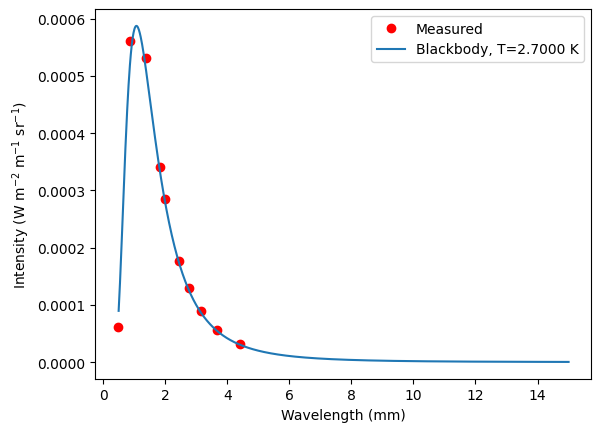

In [14]:

# Plot the measured data points and the blackbody curve
plt.plot(measured_lambda,measured_intensity,'or',label='Measured')
plt.plot(lamb_range,bb_intensity,label='Blackbody, T={:.4f} K'.format(T_guess))
plt.xlabel('Wavelength (mm)')
plt.ylabel('Intensity (W m$^{-2}$ m$^{-1}$ sr$^{-1}$)')
plt.legend()
plt.show()


In [68]:
#range di temperatura da -15K a + 15K ogni 0.1K
tempRange = np.arange(-15, 15, 0.1)

#crea array contenente la msd per ogni temperatura nel range
msd = np.array([mean_squared_deviation(T) for T in tempRange])

#estrae la temperatura corrispondente al minimo del msd
bestTemp = tempRange[msd == msd.min()].item()

print("Best temperature (min msd): {:.4f}".format(bestTemp))

Best temperature (min msd): 2.7000
